In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '..', '..')

sys.path.append(LIBRARY_DIR)

In [11]:
import os

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))

def saveas(name):
    image_name = '{}.png'.format(name)
    image_path = os.path.join(LIBRARY_DIR, 'site', '2017', '12', '09', 'images', image_name)
    plt.savefig(image_path, facecolor='#f8fafb', bbox_inches='tight')

In [4]:
blue = '#348ABD'
red = '#E24A33'
black = '#000000'
purple = '#988ED5'
green = '#8EBA42'

In [5]:
from itertools import product

import numpy as np

from neupy.algorithms.competitive.neighbours import find_neighbours_on_rect_grid
from examples.competitive.utils import plot_2d_grid

grid = np.array(list(product(range(9), range(9))))

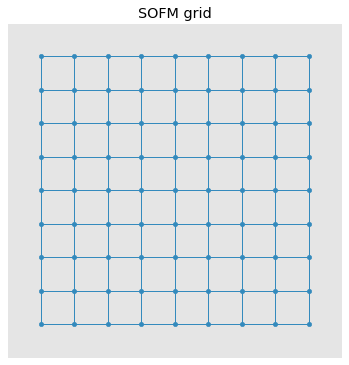

In [25]:
fig = plt.figure(figsize=(6, 6))
plt.title("SOFM grid")

plot_2d_grid(
    np.transpose(grid.reshape((9, 9, 2)), (2, 0, 1)),
    color=blue)

plt.scatter(*grid.T, color=blue)

plt.xlim(-1, 9)
plt.ylim(-1, 9)
    
plt.xticks([])
plt.yticks([])

saveas('sofm-grid')

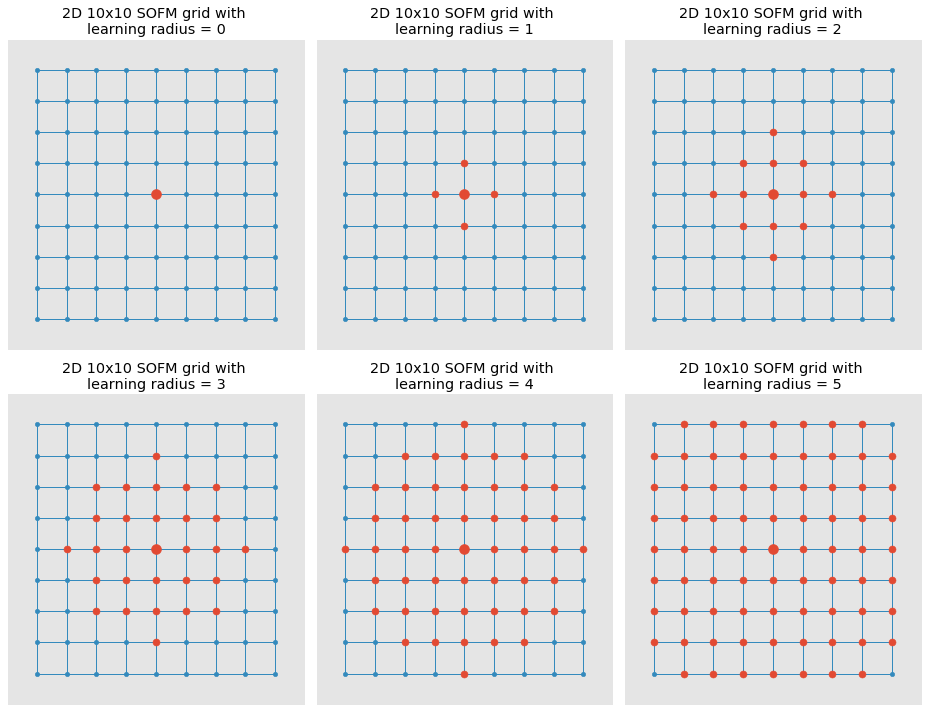

In [12]:
fig = plt.figure(figsize=(13, 10))

for index, radius in enumerate(range(6), start=1):
    plt.subplot(2, 3, index)
    red, blue = ('#E24A33', '#348ABD')
    
    plt.title('2D 10x10 SOFM grid with \nlearning radius = {}'.format(radius))

    neuron_winner = (4, 4)
    neighbour = find_neighbours_on_rect_grid(
        np.zeros((9, 9)), neuron_winner, radius)
    neighbour = neighbour.ravel()

    plot_2d_grid(
        np.transpose(grid.reshape((9, 9, 2)), (2, 0, 1)),
        color=blue)

    plt.scatter(*grid[neighbour == 0].T, color=blue)
    plt.scatter(*grid[neighbour == 1].T, color=red, s=50, zorder=100)
    plt.scatter(*neuron_winner, color=red, s=100, zorder=100)

    plt.xlim(-1, 9)
    plt.ylim(-1, 9)
    
    plt.xticks([])
    plt.yticks([])

fig.tight_layout()
saveas('sofm-learning-radius-comparison')

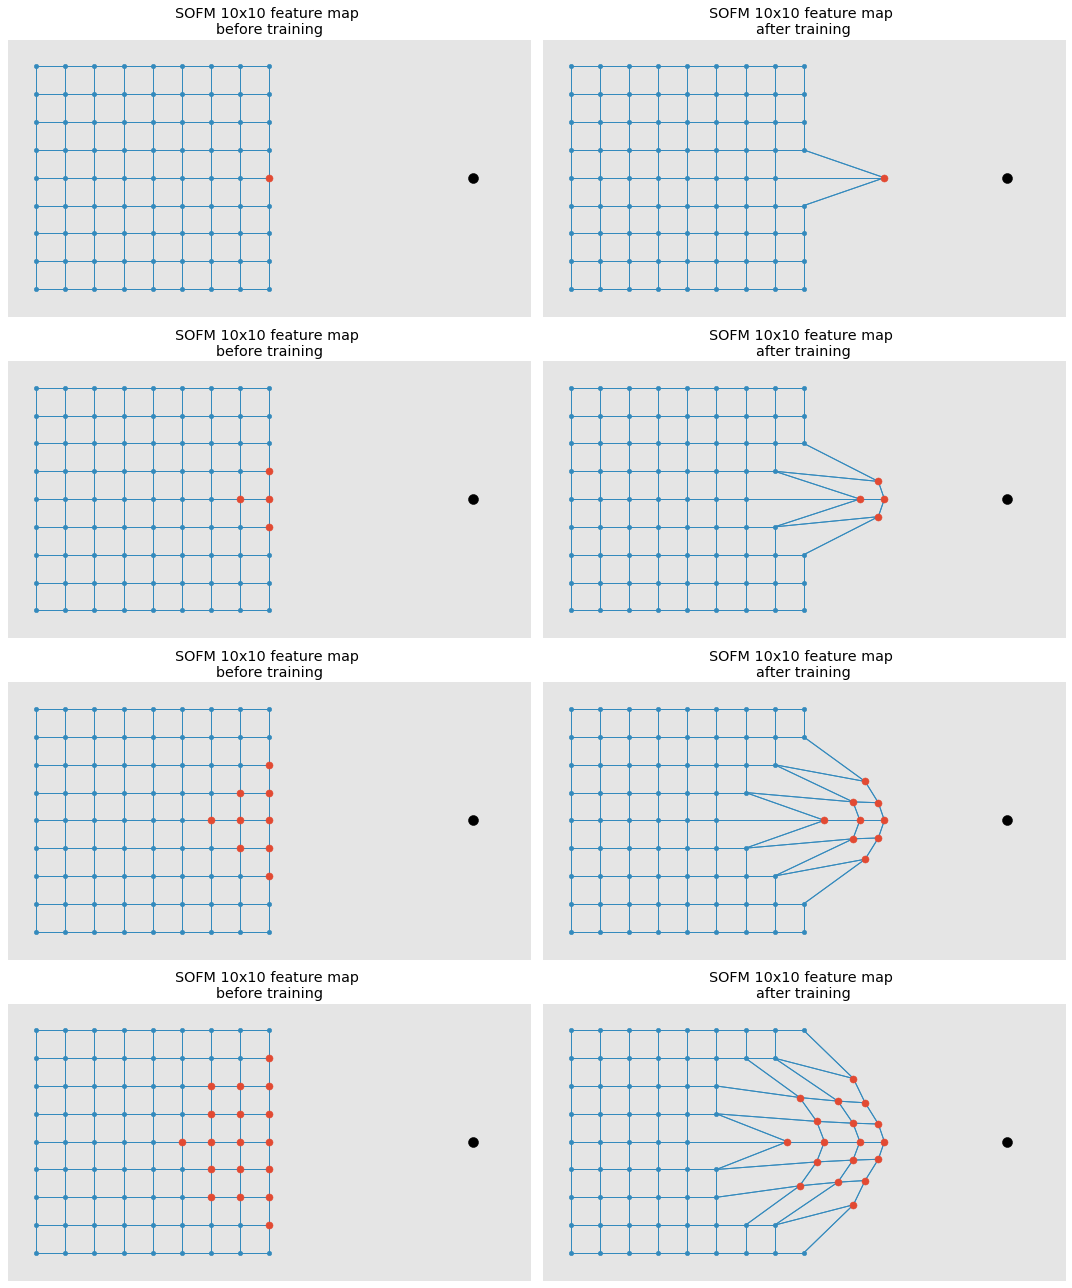

In [13]:
from neupy import algorithms

fig = plt.figure(figsize=(15, 18))

for index, radius in enumerate(range(8), start=1):
    plt.subplot(4, 2, index)

    radius = radius // 2
    neuron_winner = (8, 4)

    if index % 2 == 1:
        plt.title('SOFM 10x10 feature map \nbefore training')
        current_grid = grid.copy()
    else:
        plt.title('SOFM 10x10 feature map \nafter training')
        sofm = algorithms.SOFM(
            n_inputs=2,
            step=0.4,
            features_grid=(9, 9),
            learning_radius=radius,
            std=1,
            weight=current_grid.T)
        
        sofm.train([[15, 4]], epochs=1)
        current_grid = sofm.weight.T

    neighbour = find_neighbours_on_rect_grid(
        np.zeros((9, 9)), neuron_winner, radius)
    neighbour = neighbour.ravel()

    plot_2d_grid(
        np.transpose(current_grid.reshape((9, 9, 2)), (2, 0, 1)),
        color=blue)

    plt.scatter(*current_grid[neighbour == 0].T, color=blue)
    plt.scatter(*current_grid[neighbour == 1].T, color=red, s=50, zorder=100)
    plt.scatter(15, 4, color='#000000', s=100)

    plt.xlim(-1, 17)
    plt.ylim(-1, 9)
    
    plt.xticks([])
    plt.yticks([])

fig.tight_layout()
saveas('sofm-training-learning-radius-comparison')